- Q-Values konvergieren nicht wie erwartet
- aber 146 geht schon in die richtige Richtung!

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s145/20210513-2102/",
            "../checkpoints/s146/20210515-1747/",
            "../checkpoints/s146/20210515-1747_contd/",
            "../checkpoints/s146/20210515-1747_contd_newparam/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                           baseline_rule-based   
ts_until_regulation                                   0   
lr                                                 0.01   
discount_factor                                     0.9   
batch_size                                          128   
lambda_rwd_mstpc                                    0.1   
lambda_rwd_energy                                 5e-06   
reward_offset                                       0.0   
stp_reward_step_offset                              0.0   
target_network_update_freq                            3   
epsilon_initial                                     1.0   
epsilon_final_step                                  100   
episodes_count                                      100   
agent_network                    2HiddenLayer,Trapezium   
agent_init_gain                                     0.8   
agent_w_l2                                        1e-05   
network_storage_frequency                            10   
shared_network_per_agent_class                        0   
model                           Building_5ZoneAirCooled   
next_occ_horizont                                     0   

                                                                  s145  \
algorithm                                                         ddqn   
ts_until_regulation                                                NaN   
lr                                                                0.02   
discount_factor                                                   0.75   
batch_size                                                         256   
lambda_rwd_mstpc                                                   0.2   
lambda_rwd_energy                                                1e-05   
reward_offset                                                      0.1   
stp_reward_step_offset                                             1.0   
target_network_update_freq                                           6   
epsilon_initial                                                    NaN   
epsilon_final_step                                               31500   
episodes_count                                                     150   
agent_network                              2HiddenLayer,Trapezium,SiLU   
agent_init_gain                                                    0.6   
agent_w_l2                                                       1e-06   
network_storage_frequency                                          150   
shared_network_per_agent_class                                       1   
model                           Building_5ZoneAirCooled_SingleSetpoint   
next_occ_horizont                                                  NaN   

                                                                  s146  \
algorithm                                                         ddqn   
ts_until_regulation                                                  0   
lr                                                               0.045   
discount_factor                                                   0.85   
batch_size                                                         256   
lambda_rwd_mstpc                                                   0.1   
lambda_rwd_energy                                                5e-06   
reward_offset                                                     0.05   
stp_reward_step_offset                                             1.0   
target_network_update_freq                                           6   
epsilon_initial                                                    NaN   
epsilon_final_step                                               33600   
episodes_count                                                     160   
agent_network                              2HiddenLayer,Trapezium,SiLU   
agent_init_gain                                                    0.7   
agent_w_l2                                                       1e-06  

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001           s145  \
Number of training episodes                      1.0   31843.000000   
Runtime in s                                     0.0  151945.572358   
Runtime in h                                     0.0      42.207103   
Mean episode runtime in s                        0.0       4.771710   
Mean episode runtime during eval. episode in s   0.0       5.025088   
Mean episode runtime after eval. episode in s    NaN       4.716188   
Mean episode runtime in no eval. episode in s    NaN       4.770012   

                                                         s146           s146  \
Number of training episodes                      33600.000000   49600.000000   
Runtime in s                                    186108.835415  262146.443732   
Runtime in h                                        51.696899      72.818457   
Mean episode runtime in s                            5.538953       5.285211   
Mean episode runtime during eval. episode in s       5.742502       5.479079   
Mean episode runtime after eval. episode in s        5.479936       5.230271   
Mean episode runtime in no eval. episode in s        5.537673       5.283991   

                                                         s146  
Number of training episodes                      43844.000000  
Runtime in s                                    235340.963301  
Runtime in h                                        65.372490  
Mean episode runtime in s                            5.367689  
Mean episode runtime during eval. episode in s       5.564090  
Mean episode runtime after eval. episode in s        5.307618  
Mean episode runtime in no eval. episode in s        5.366454

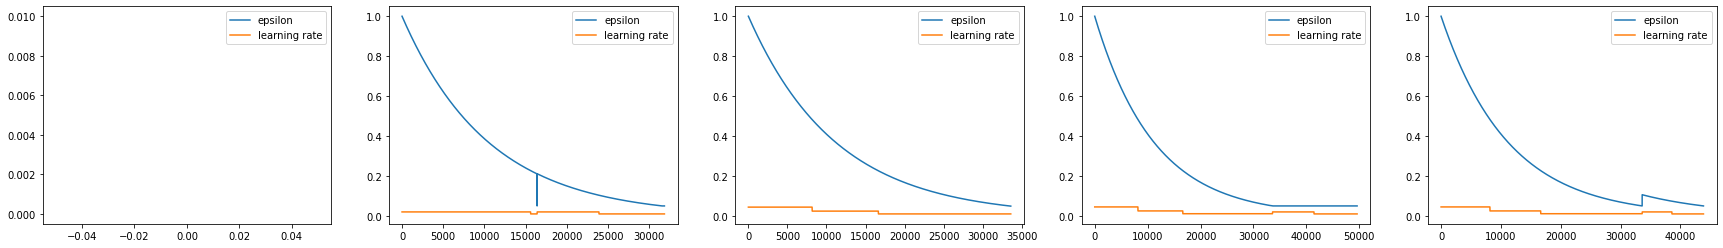

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

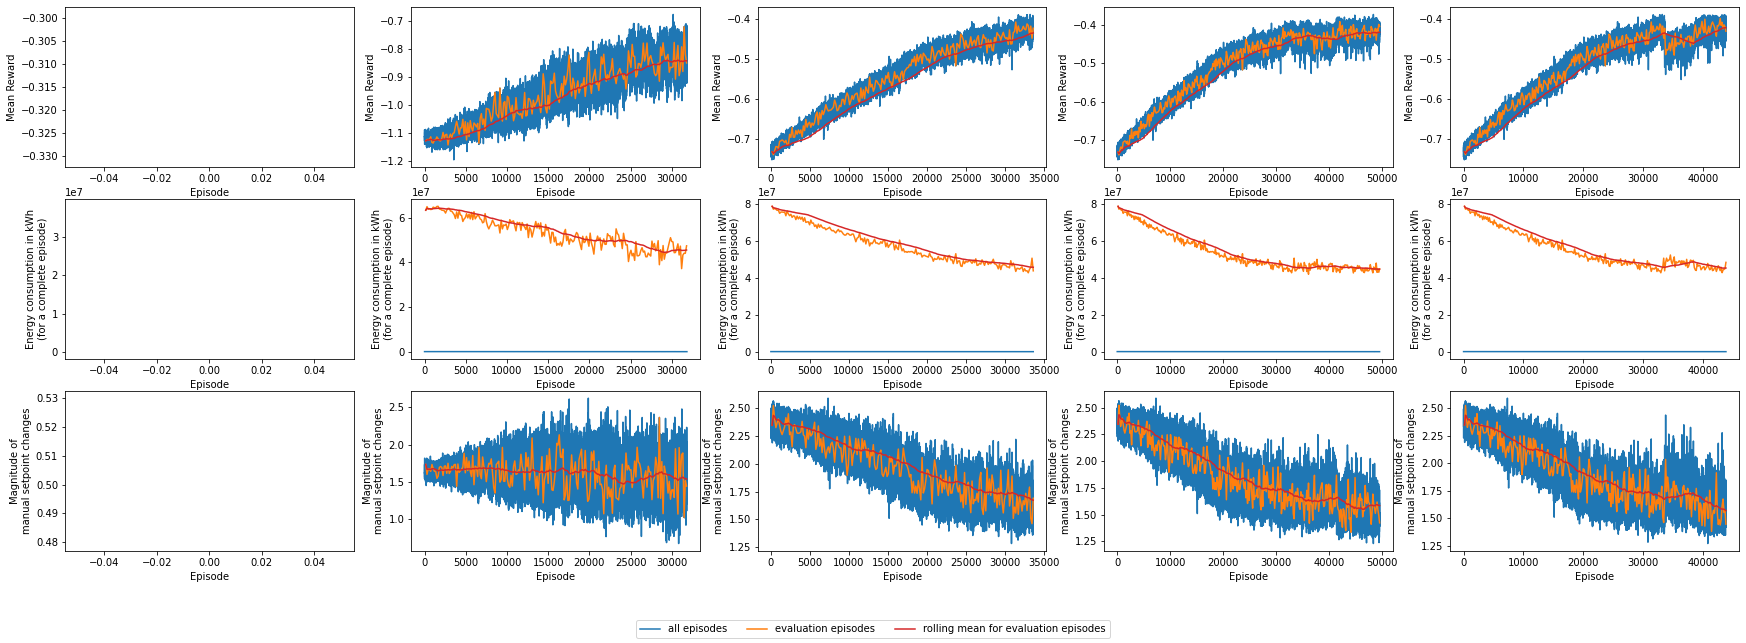

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

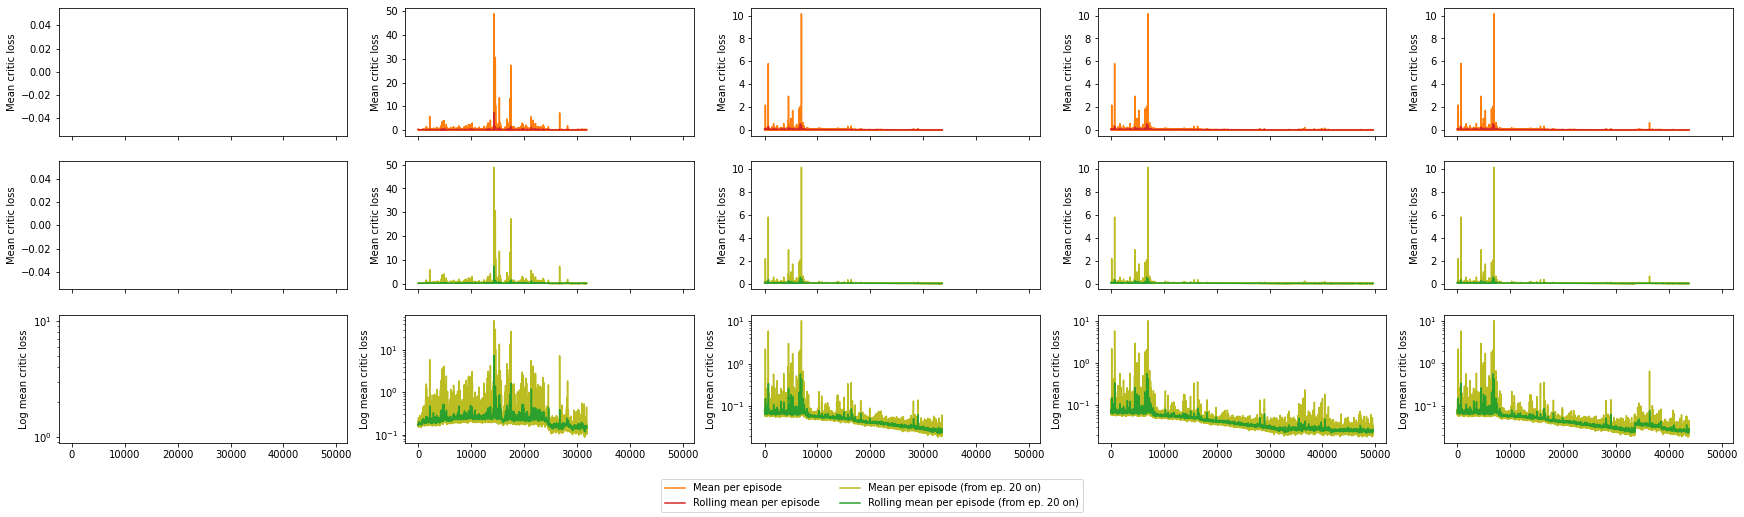

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

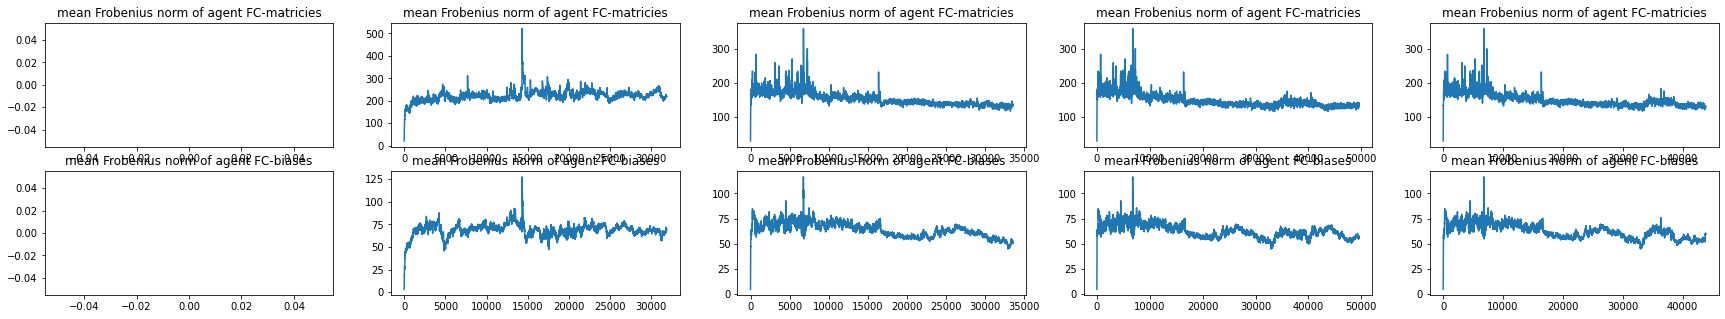

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  31799
Last available evaluation episode for dfs2:  33599
Last available evaluation episode for dfs3:  49599
Last available evaluation episode for dfs4:  43839


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38039.77 kWh; Numer of setpoint changes: 362.9102110138981
For episode 31799: Energy consumption:   44656.72 kWh; Numer of setpoint changes: 933.3043740356484
For episode 33599: Energy consumption:   43794.41 kWh; Numer of setpoint changes: 1215.4690444219464
For episode 49599: Energy consumption:   44808.38 kWh; Numer of setpoint changes: 1023.4343391742798
For episode 43839: Energy consumption:   45670.43 kWh; Numer of setpoint changes: 1134.454303550893

Mean values for episode ...
...     0: Reward: -0.31501 kWh; Setpoint change magnit.:  0.50474; Energy cons.: 52906.49383
... 31799: Reward: -0.78071 kWh; Setpoint change magnit.:  1.29806; Energy cons.: 62109.48203
... 33599: Reward: -0.42360 kWh; Setpoint change magnit.:  1.69050; Energy cons.: 60910.17043
... 49599: Reward: -0.40394 kWh; Setpoint change magnit.:  1.42341; Energy cons.: 62320.41906
... 43839: Reward: -0.42538 kWh; Setpoint change ma

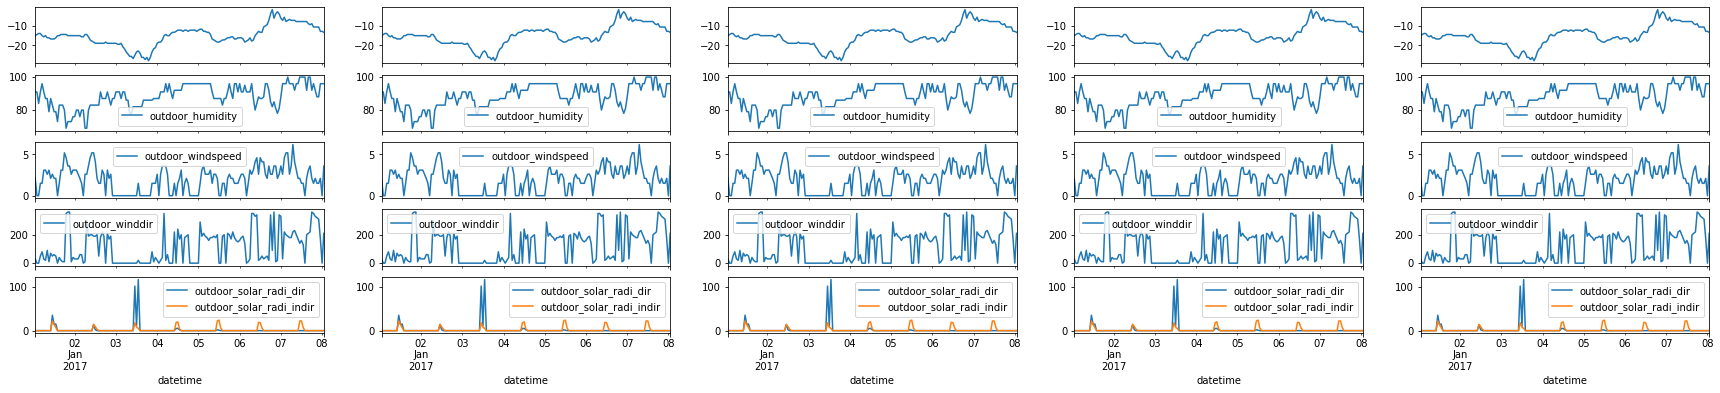

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

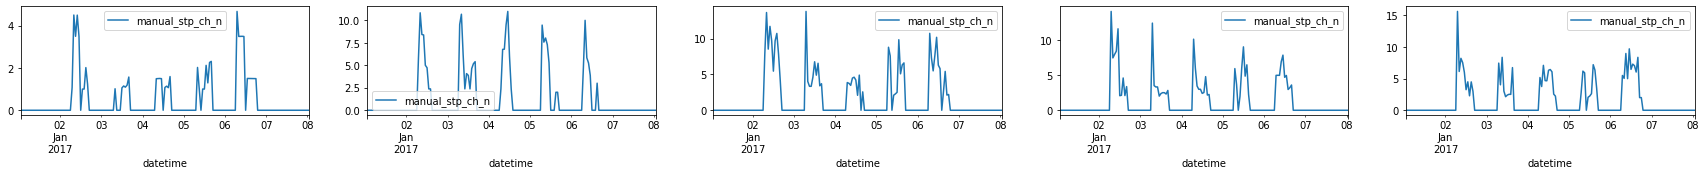

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

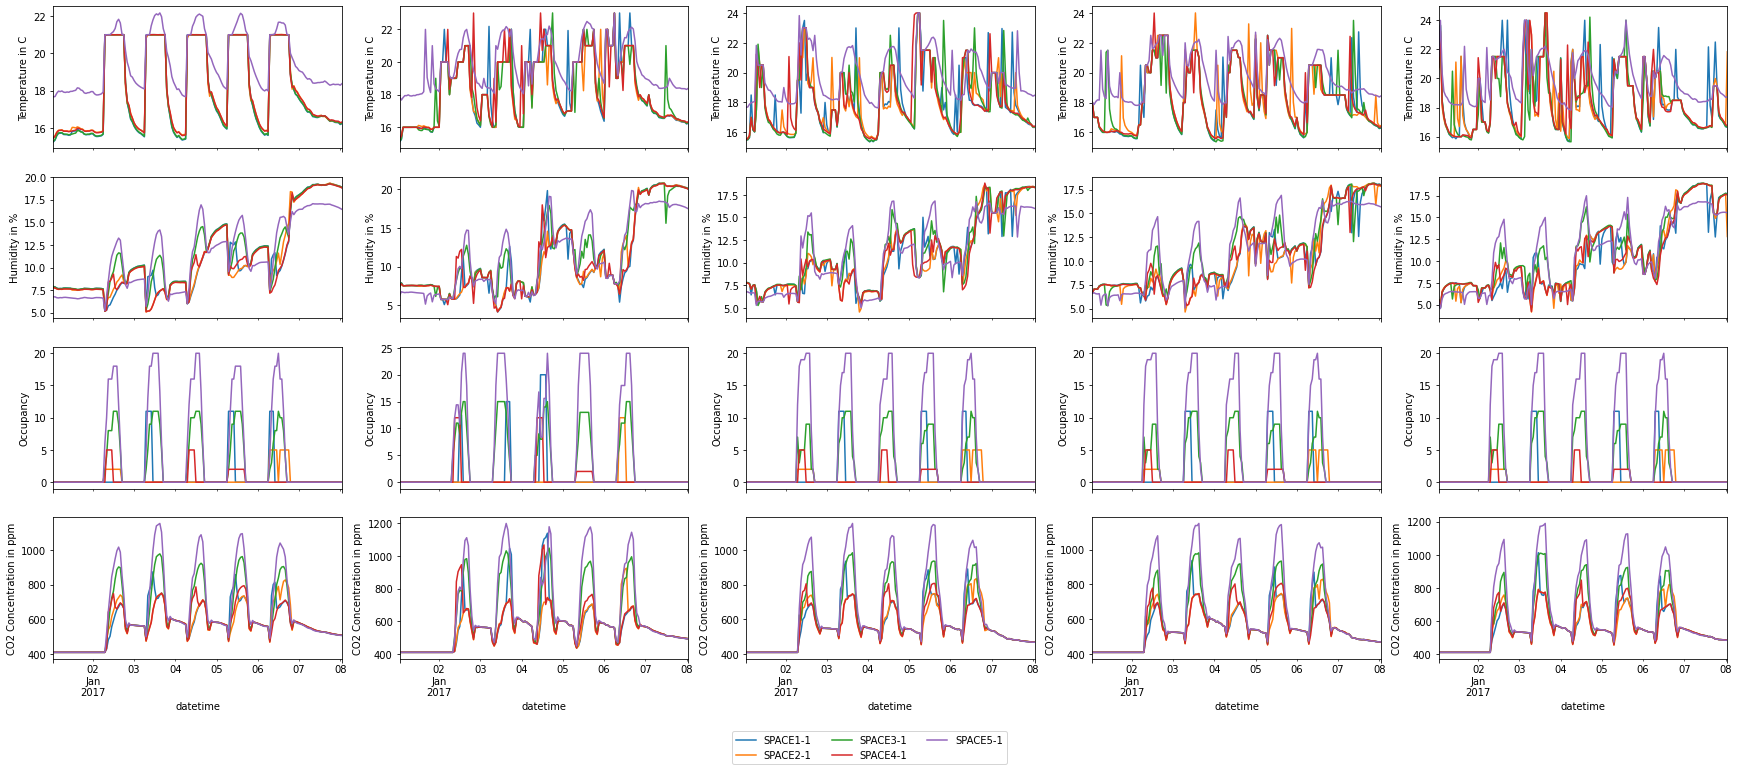

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: [0 1 2 3 4] 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: [0 1 2 3 4] 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: [0 1 2 3 4] 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: [0 1 2 3 4] 

Available Rooms     in (sub-)dfs4: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs4: [0 1 2 3 4] 



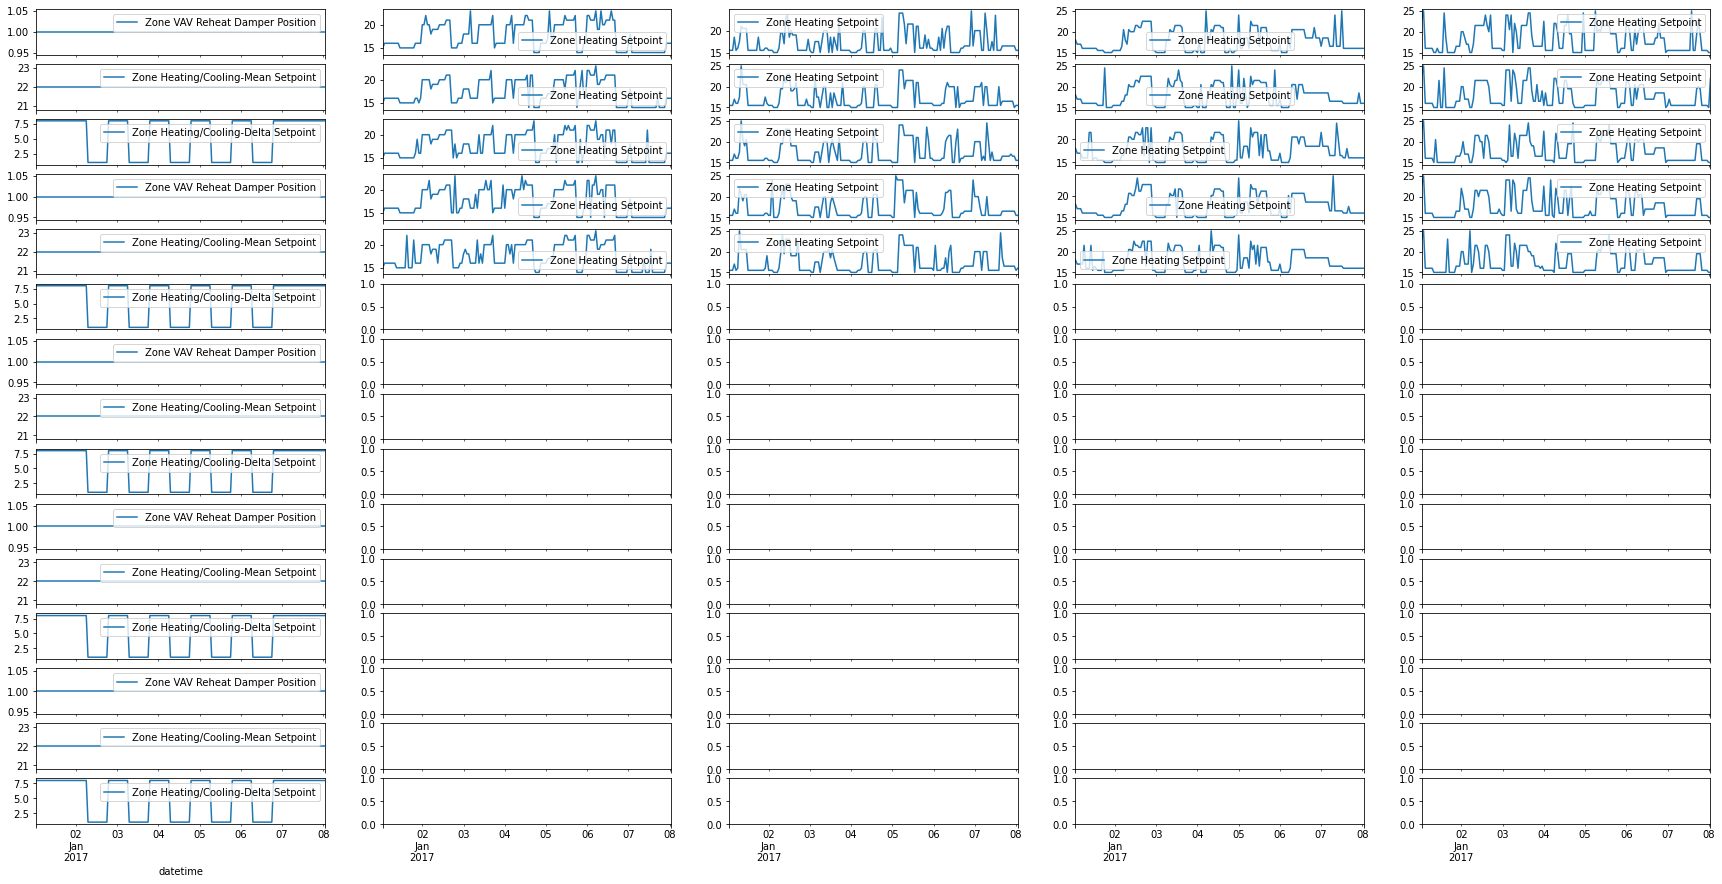

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

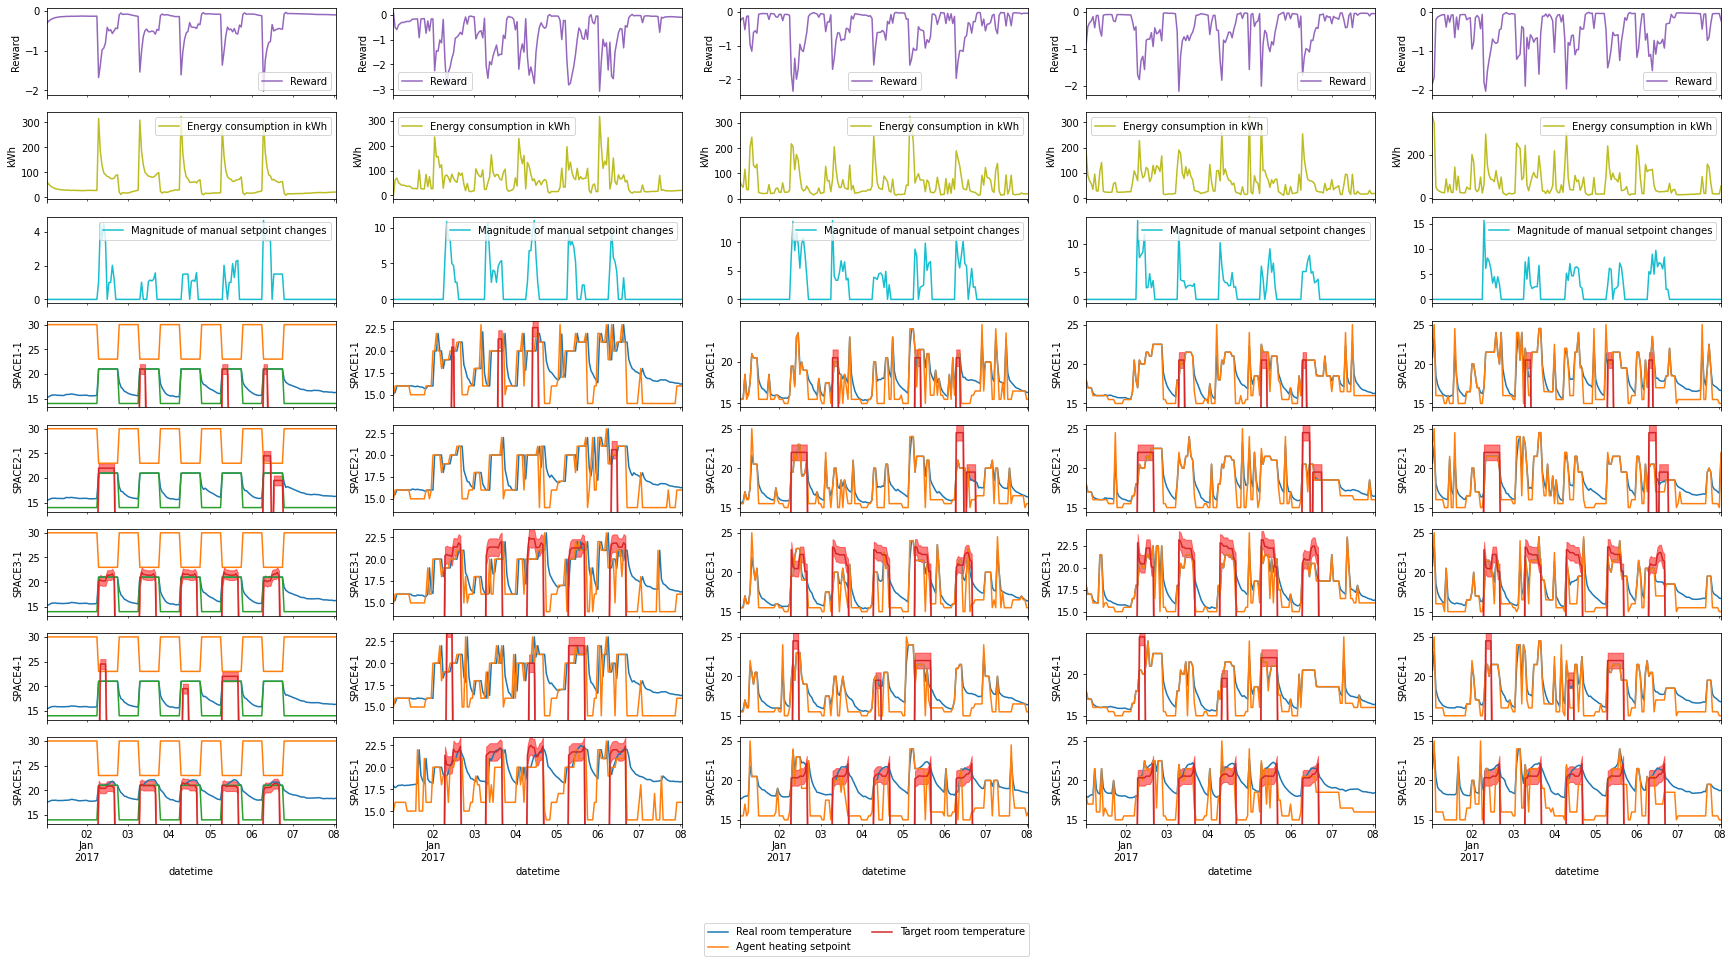

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

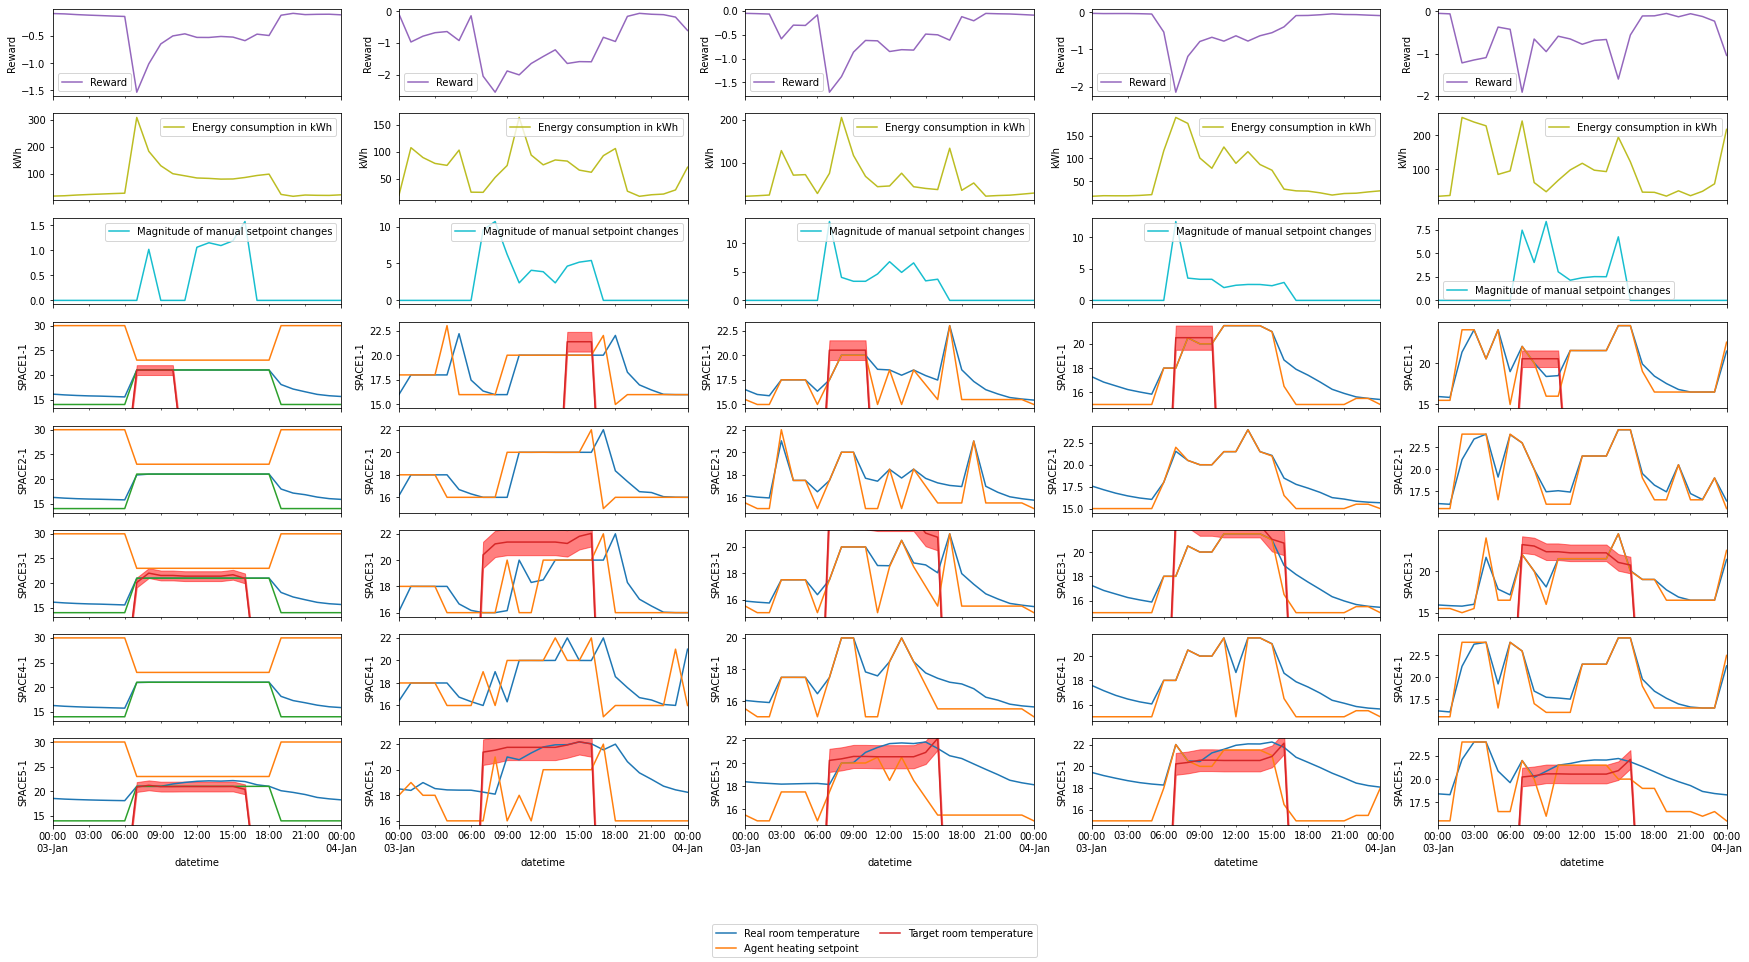

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52005.7 Wh, mean reward = -0.3090
For plot number 2, mean energy consumption =  62064.1 Wh, mean reward = -0.7602
For plot number 3, mean energy consumption =  60658.6 Wh, mean reward = -0.4134
For plot number 4, mean energy consumption =  61967.1 Wh, mean reward = -0.3999
For plot number 5, mean energy consumption =  62694.0 Wh, mean reward = -0.4181


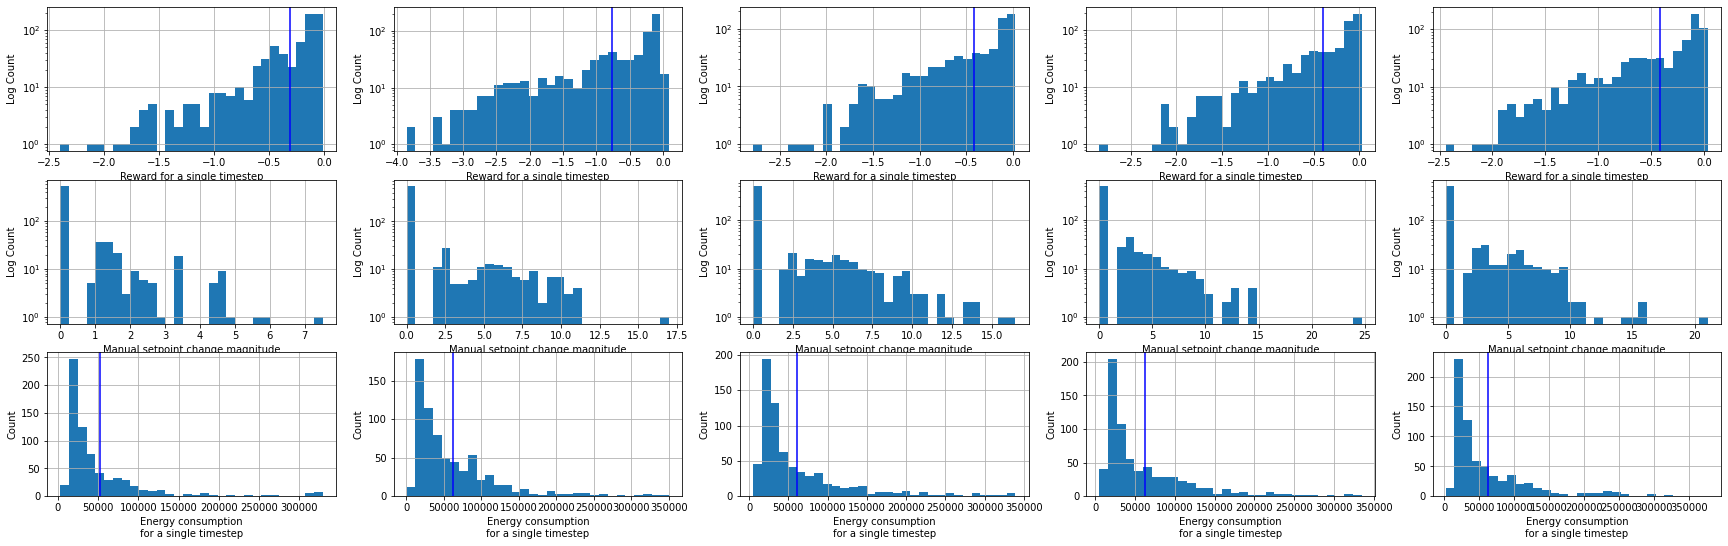

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

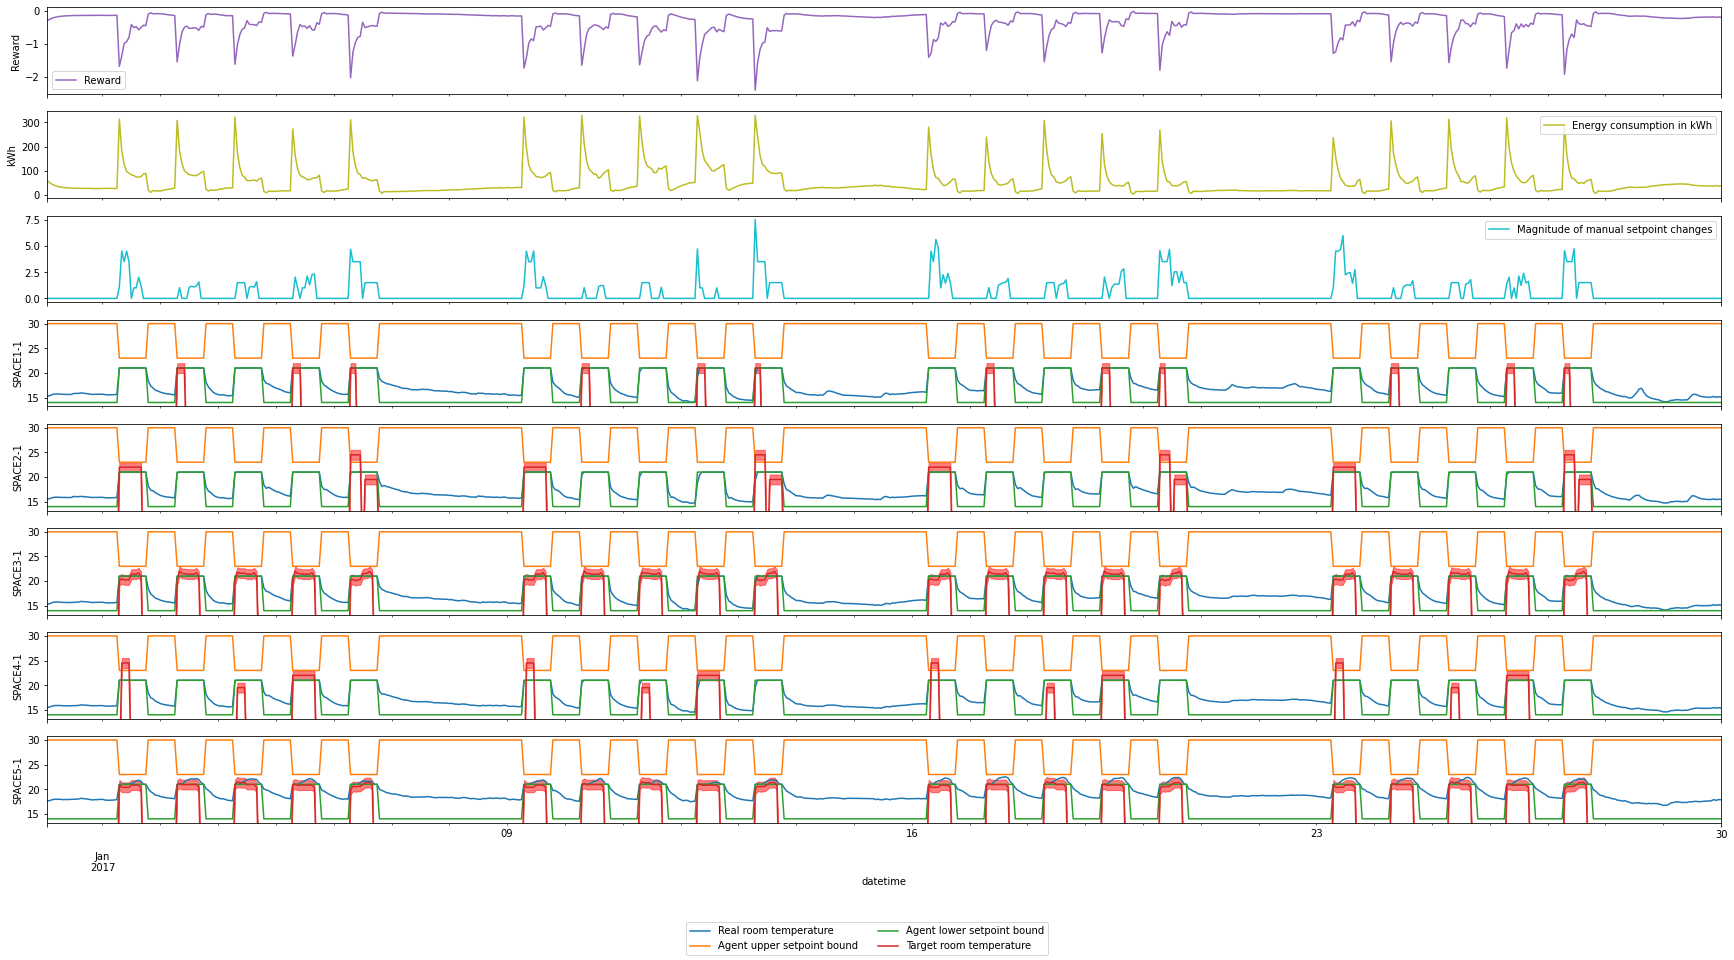

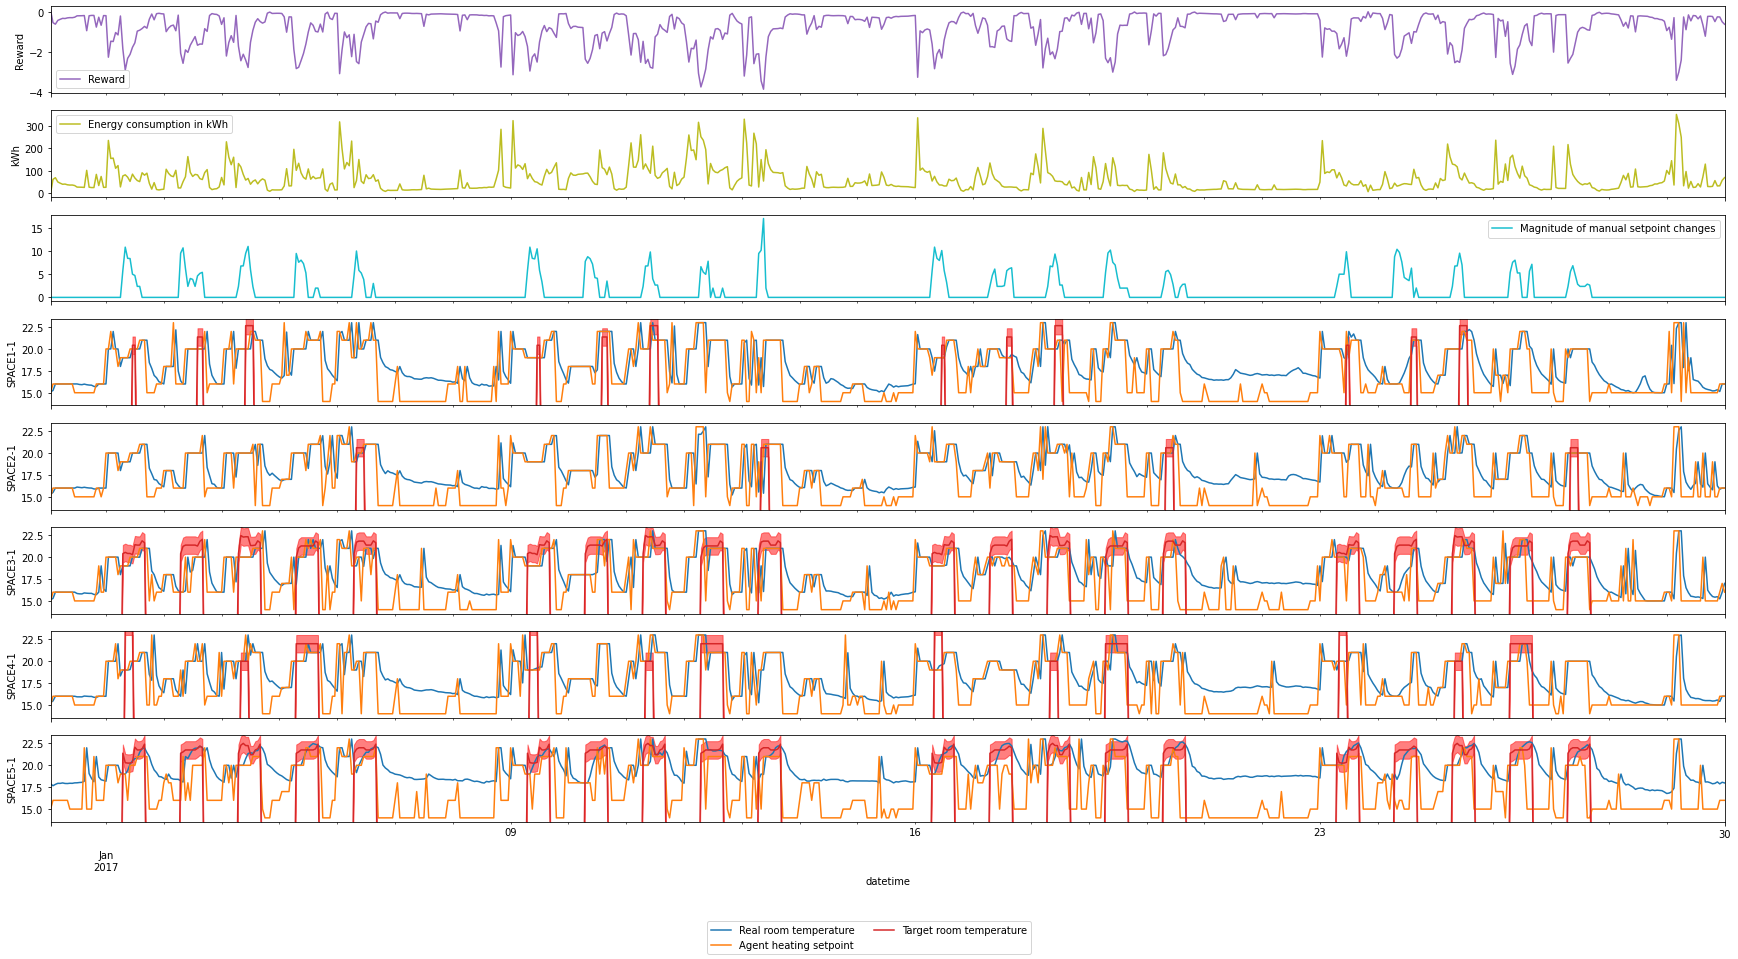

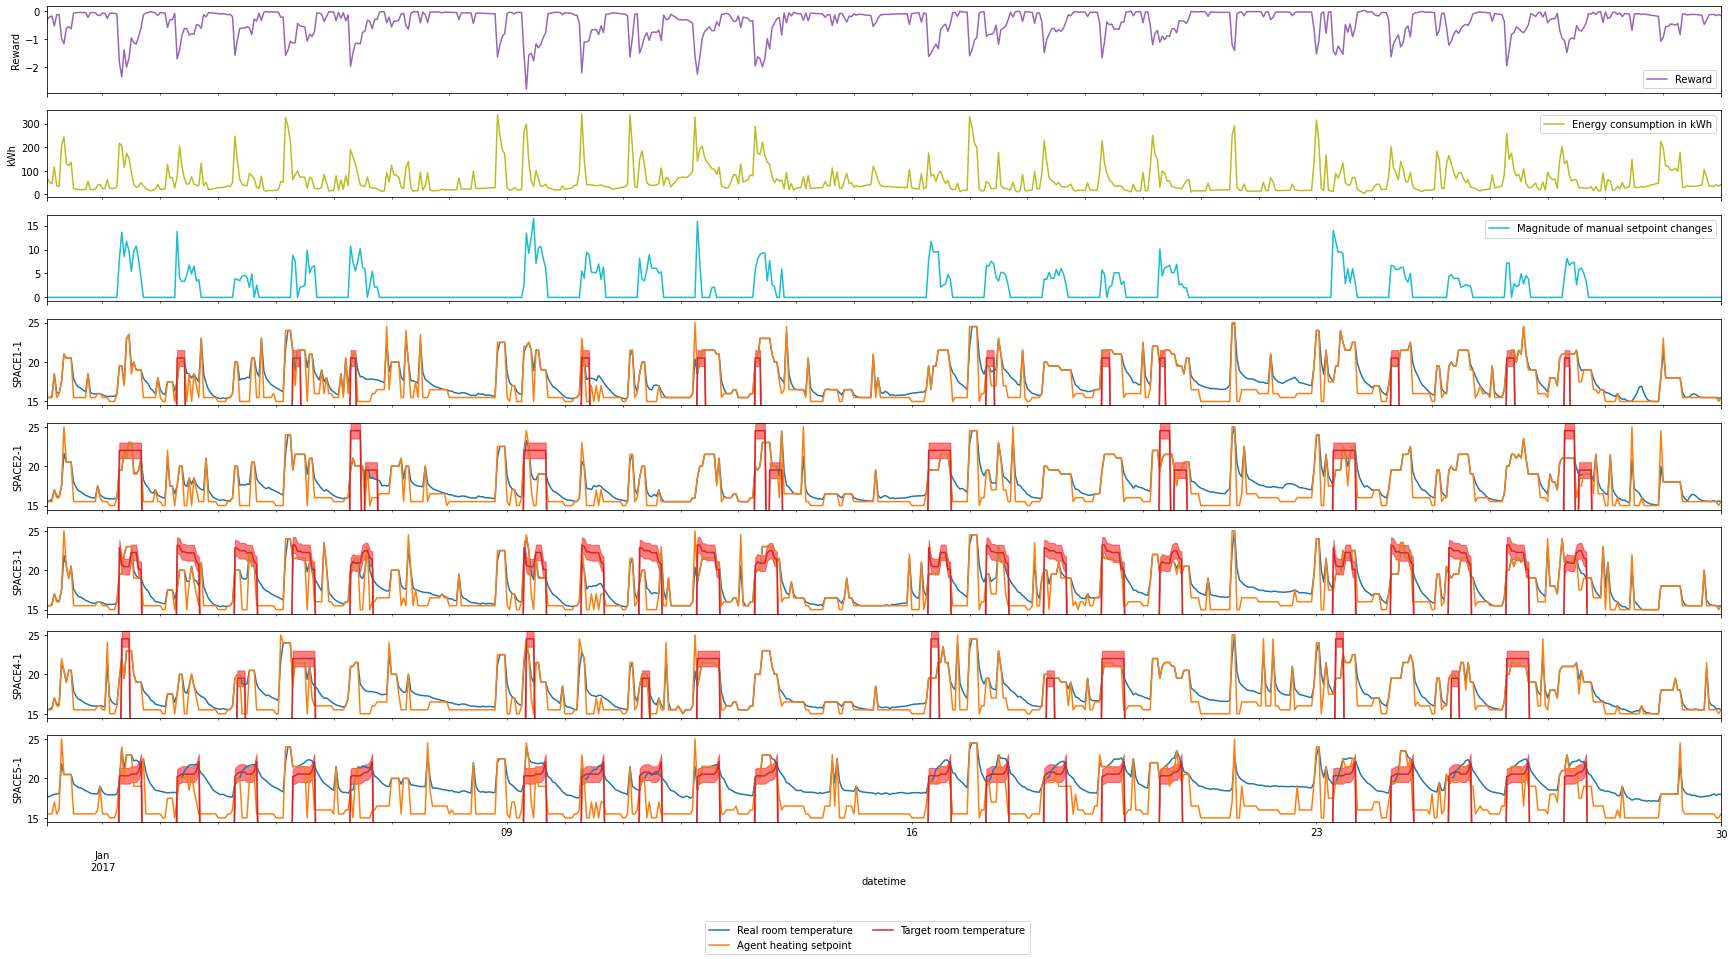

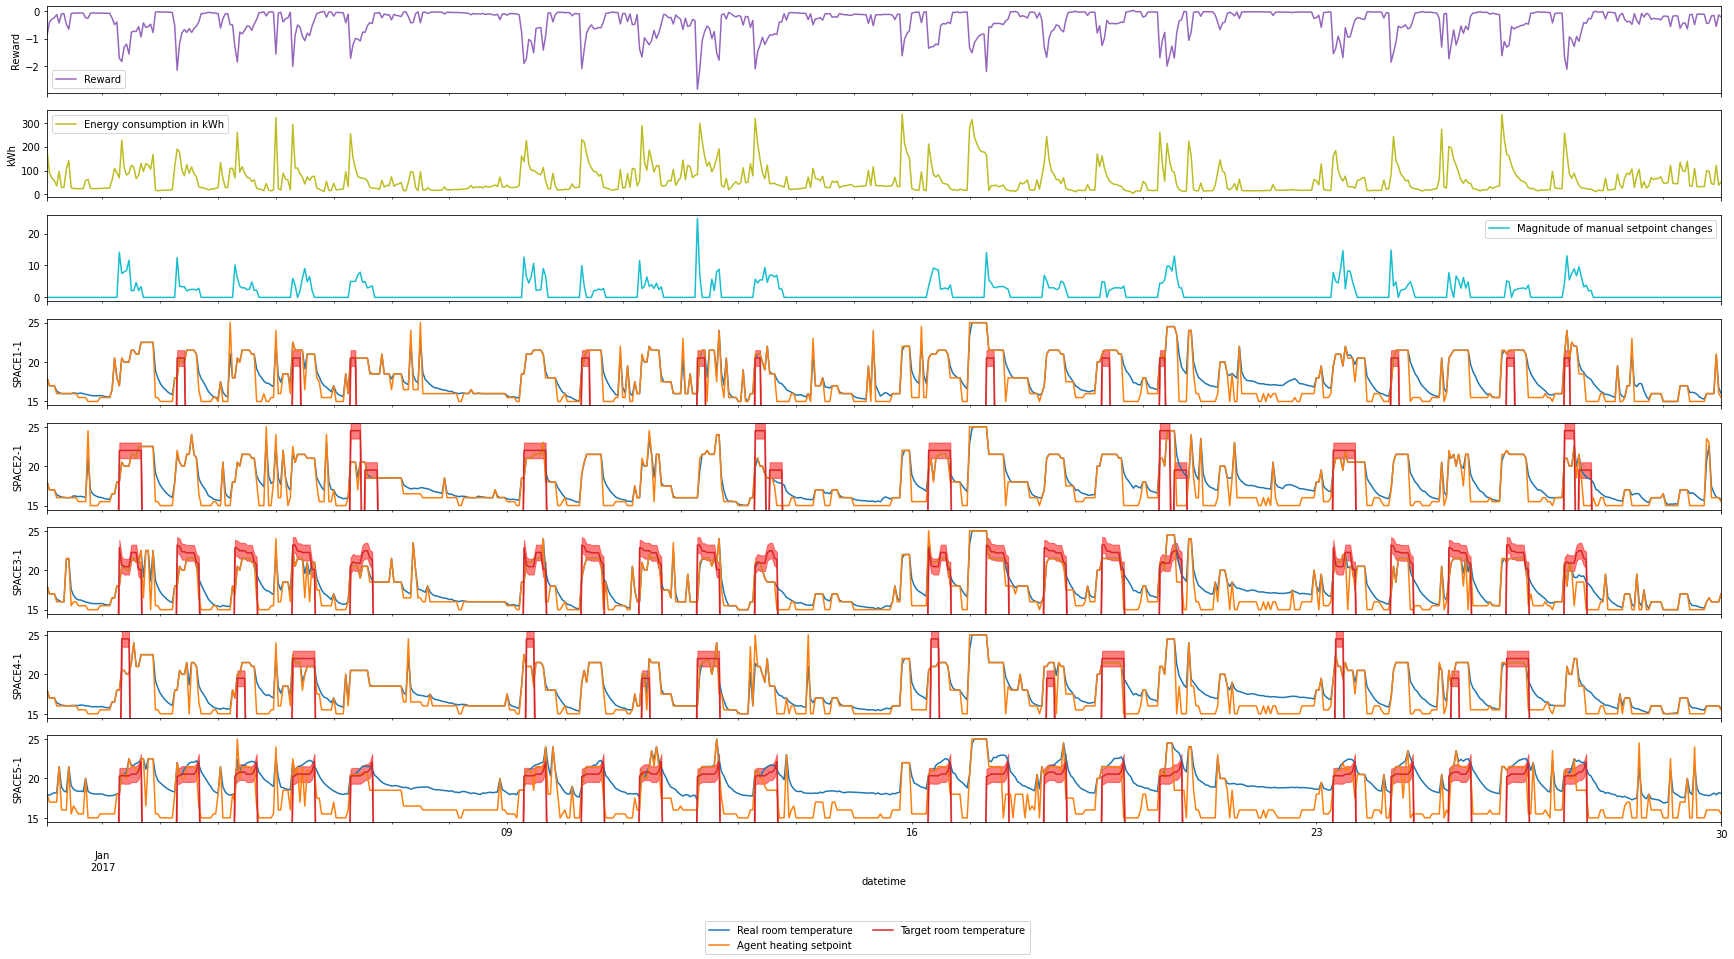

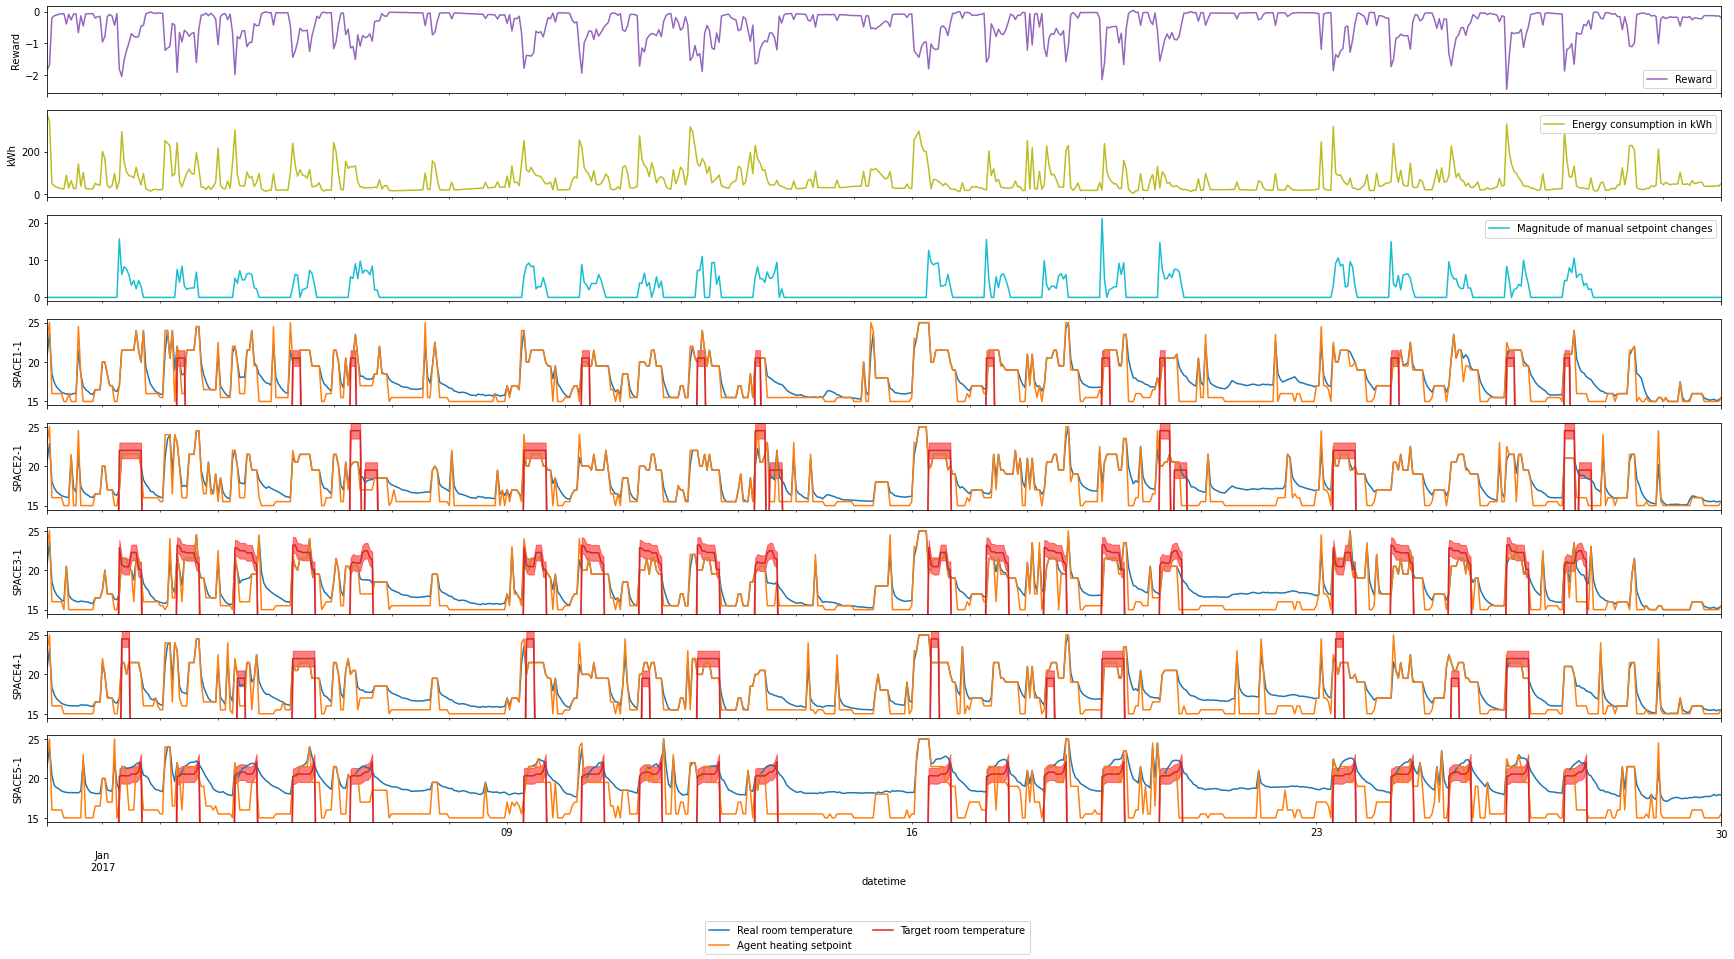

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

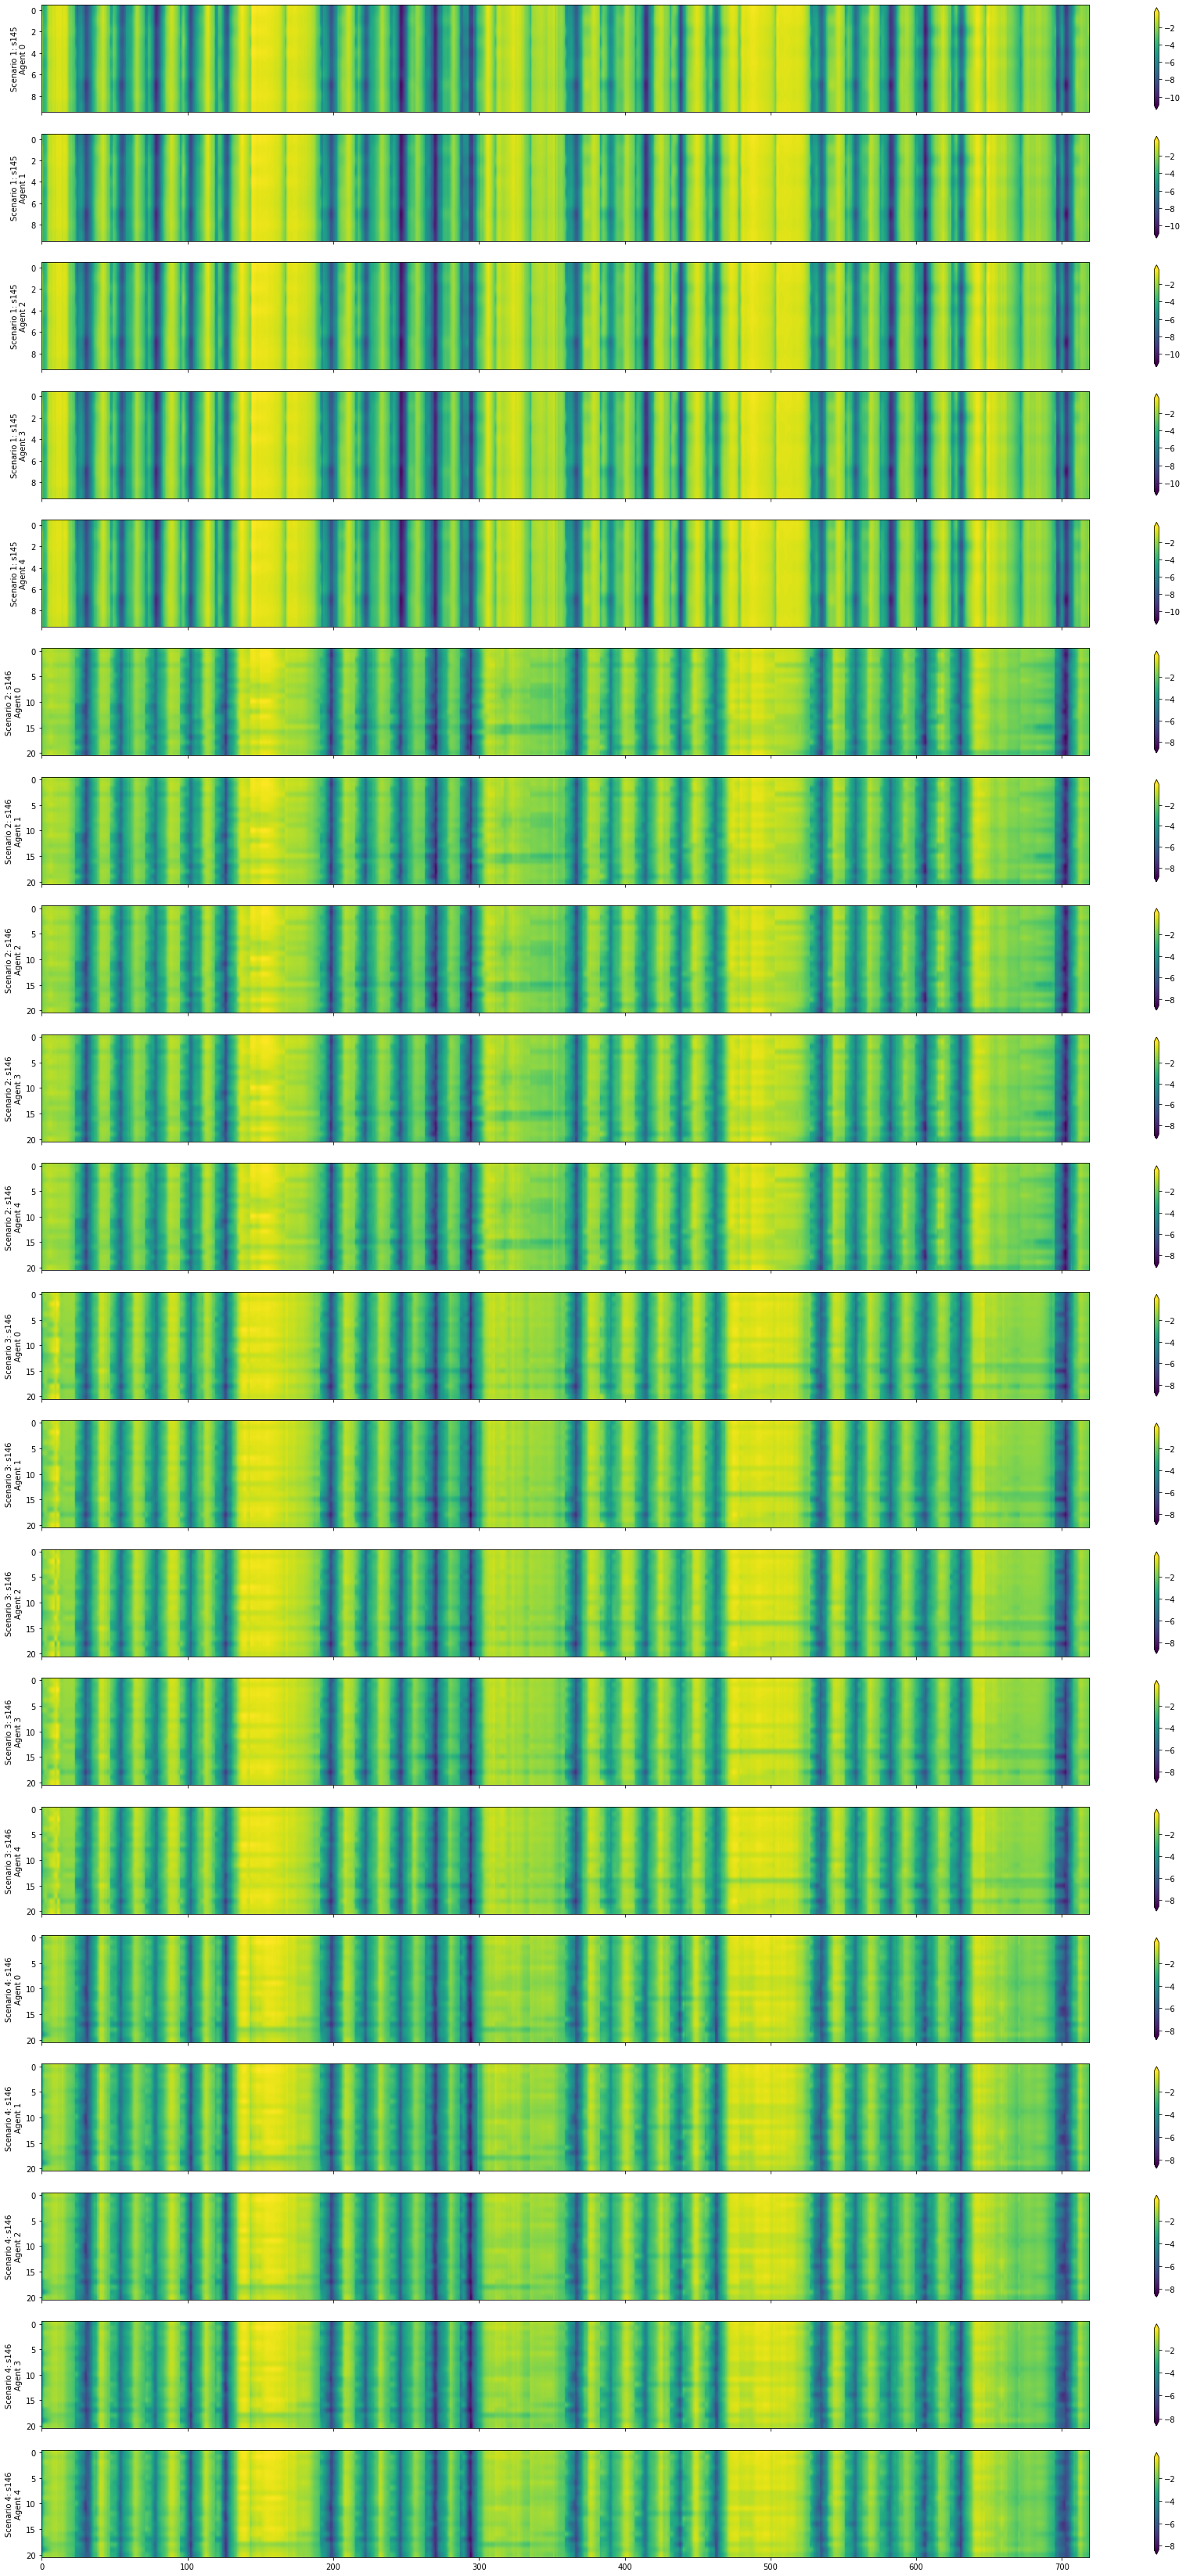

In [33]:
vh.plot_q_values(q_values, fig_width)